In [1]:
import os
import shutil
import skimage.io as io

import numpy as np
from tensorflow.python import keras
import matplotlib.pyplot as plt

/usr/local/lib/python3.5/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:75: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "
/usr/local/lib/python3.5/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:78: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


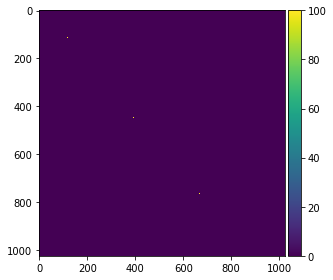

In [18]:
x = io.imread('/data/contour_data/Training_Freeze_1_Val_HH3_NaK_BT/Point1/raw/LaminAC.tif')
io.imshow(x *100)

In [2]:
CHANNEL_AXIS = 3
training_data = np.load(os.path.join('/data/npz_data', 
                                     "TA849" + ".npz"))

X, y = training_data["X"], training_data["y"]
print("X.shape: {} & y.shape: {}".format(X.shape, y.shape))


X.shape: (1, 1024, 1024, 5) & y.shape: (1, 1024, 1024, 1)


In [3]:
hist = np.load('/data/models/20190822_training_freeze_1/Training_Freeze_1_fgbg_81_rf_256_dense_64_conv_subsampled.npz')
hist['loss_history'].tolist()['acc']

[0.8619744420825073,
 0.8887581145315473,
 0.9036440308447675,
 0.9123584816500048,
 0.9193867563519454,
 0.9245901189454342,
 0.9285707751850886,
 0.932135223393829,
 0.935164547003701,
 0.9376755162943275,
 0.9395934272656309,
 0.9412445382223508,
 0.9427096514522776,
 0.9439308332391364,
 0.9451535395975144,
 0.946382344241969,
 0.9472696448675825,
 0.9477056723206125,
 0.9484801546505357,
 0.9495153387138727,
 0.9500916267481206,
 0.9509316656535501,
 0.9513722668242273,
 0.9520796680105782]

In [20]:
folder_name = '20190822_training_freeze_1'

fgbg_MODEL_NAME = 'Training_Freeze_1_fgbg_81_rf_256_dense_64_conv_subsampled' + "_epoch_20"
fgbg_weights_file = os.path.join('/data/models/', "20190822_training_freeze_1", fgbg_MODEL_NAME + ".h5")

In [21]:
# load fgbg model
from deepcell import model_zoo
run_fgbg_model = model_zoo.bn_feature_net_2D(
    receptive_field=81,
    dilated=True,
    n_features=2,
    input_shape=X.shape[1:])

run_fgbg_model.load_weights(fgbg_weights_file)

In [22]:
# run the two models
test_images = run_fgbg_model.predict(X[:1, ...])

In [40]:
np.save(os.path.join('/data/models', '20190903_subsampling', fgbg_MODEL_NAME + "_point8metrics"), test_images)

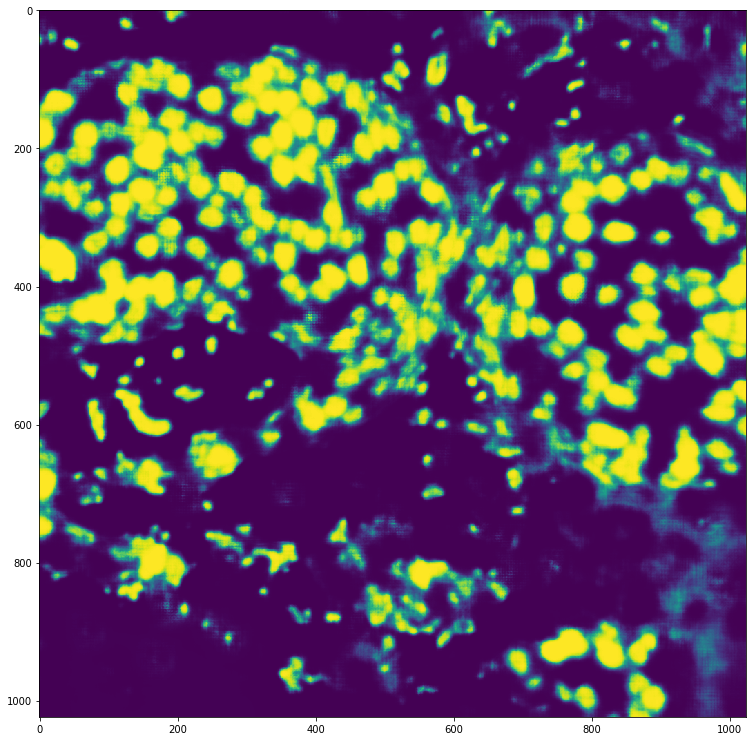

In [7]:
plt.figure(figsize = (13, 13))
plt.imshow(test_images[0, :, :, 1])

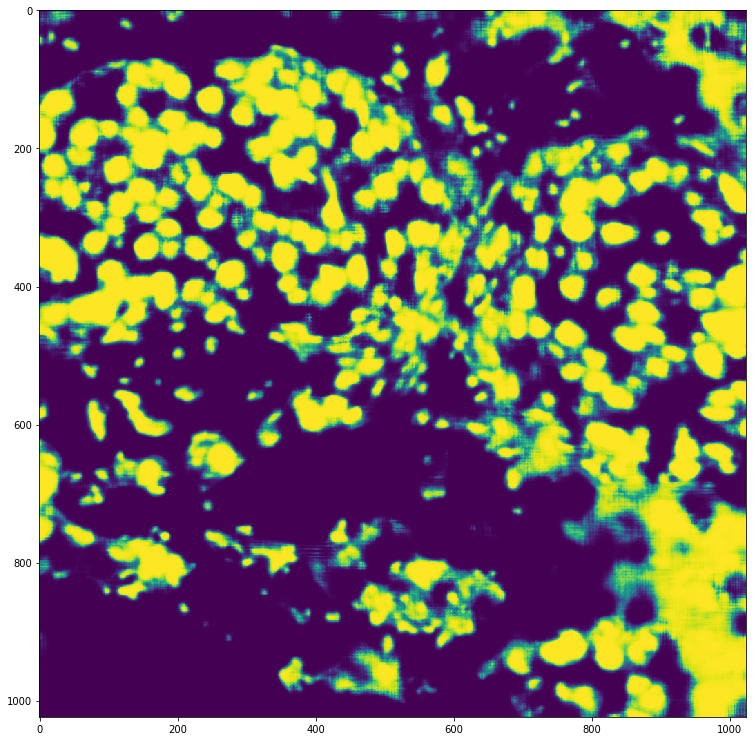

In [23]:
plt.figure(figsize = (13, 13))
plt.imshow(test_images[0, :, :, 1])